## **0- Veri Setinin Hazırlanması**

In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breastcancerproteomes/clinical_data_breast_cancer.csv
/kaggle/input/breastcancerproteomes/PAM50_proteins.csv
/kaggle/input/breastcancerproteomes/77_cancer_proteomes_CPTAC_itraq.csv


In [89]:
# Veri setini notebook içerisine aldım
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/breastcancerproteomes/77_cancer_proteomes_CPTAC_itraq.csv")
df = df_.copy()

## **1- Veriye İlk Bakış**

In [90]:
# Veri setini görmek için genel bilgi edinme
df

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12548,NP_001191293,NaN,protein FAM24B precursor,NaN,NaN,NaN,-16.029761,1.729692,4.107251,-9.584499,...,-6.662350,NaN,NaN,NaN,NaN,NaN,NaN,-8.020071,-3.093822,-4.602418
12549,NP_775791,NaN,putative uncharacterized protein C9orf62,NaN,NaN,NaN,-2.046065,-0.425182,-3.203370,-4.786183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049608,-0.646977,0.240590
12550,NP_004065,COX8A,"cytochrome c oxidase subunit 8A, mitochondrial",NaN,NaN,NaN,-1.778435,-0.149673,1.971481,-3.103949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12551,NP_068752,MIIP,migration and invasion-inhibitory protein,-0.633517,4.840325,-1.965192,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019861,-1.718327,-0.369183


In [91]:
# Veri setindeki satır ve sütun sayılarını .shape kullanarak görebiliriz
df.shape # -> (satır, sütun)

(12553, 86)

In [92]:
df.dtypes # Veri tipi görme

RefSeq_accession_number     object
gene_symbol                 object
gene_name                   object
AO-A12D.01TCGA             float64
C8-A131.01TCGA             float64
                            ...   
BH-A0C7.36TCGA             float64
A2-A0SX.36TCGA             float64
263d3f-I.CPTAC             float64
blcdb9-I.CPTAC             float64
c4155b-C.CPTAC             float64
Length: 86, dtype: object

In [93]:
# Veri setindeki kolonları yazdırma
print(df.columns, '\n')

# Toplam kolon sayısı
print(f" Veri seti içerisinde toplam {len(df.columns)} kolon vardır. \n")

# Hangi tipte veri döndüğü
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

Index(['RefSeq_accession_number', 'gene_symbol', 'gene_name', 'AO-A12D.01TCGA',
       'C8-A131.01TCGA', 'AO-A12B.01TCGA', 'BH-A18Q.02TCGA', 'C8-A130.02TCGA',
       'C8-A138.03TCGA', 'E2-A154.03TCGA', 'C8-A12L.04TCGA', 'A2-A0EX.04TCGA',
       'AO-A12D.05TCGA', 'AN-A04A.05TCGA', 'BH-A0AV.05TCGA', 'C8-A12T.06TCGA',
       'A8-A06Z.07TCGA', 'A2-A0CM.07TCGA', 'BH-A18U.08TCGA', 'A2-A0EQ.08TCGA',
       'AR-A0U4.09TCGA', 'AO-A0J9.10TCGA', 'AR-A1AP.11TCGA', 'AN-A0FK.11TCGA',
       'AO-A0J6.11TCGA', 'A7-A13F.12TCGA', 'BH-A0E1.12TCGA', 'A7-A0CE.13TCGA',
       'A2-A0YC.13TCGA', 'AO-A0JC.14TCGA', 'A8-A08Z.14TCGA', 'AR-A0TX.14TCGA',
       'A8-A076.15TCGA', 'AO-A126.15TCGA', 'BH-A0C1.16TCGA', 'A2-A0EY.16TCGA',
       'AR-A1AW.17TCGA', 'AR-A1AV.17TCGA', 'C8-A135.17TCGA', 'A2-A0EV.18TCGA',
       'AN-A0AM.18TCGA', 'D8-A142.18TCGA', 'AN-A0FL.19TCGA', 'BH-A0DG.19TCGA',
       'AR-A0TV.20TCGA', 'C8-A12Z.20TCGA', 'AO-A0JJ.20TCGA', 'AO-A0JE.21TCGA',
       'AN-A0AJ.21TCGA', 'A7-A0CJ.22TCGA', 'AO-A12F

In [94]:
# Veri setiyle alakalı bilgi vermesi için
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12553 entries, 0 to 12552
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RefSeq_accession_number  12553 non-null  object 
 1   gene_symbol              10773 non-null  object 
 2   gene_name                12553 non-null  object 
 3   AO-A12D.01TCGA           11334 non-null  float64
 4   C8-A131.01TCGA           11335 non-null  float64
 5   AO-A12B.01TCGA           11334 non-null  float64
 6   BH-A18Q.02TCGA           12024 non-null  float64
 7   C8-A130.02TCGA           12025 non-null  float64
 8   C8-A138.03TCGA           11833 non-null  float64
 9   E2-A154.03TCGA           11833 non-null  float64
 10  C8-A12L.04TCGA           11732 non-null  float64
 11  A2-A0EX.04TCGA           11732 non-null  float64
 12  AO-A12D.05TCGA           11276 non-null  float64
 13  AN-A04A.05TCGA           11276 non-null  float64
 14  BH-A0AV.05TCGA        

In [95]:
# Aşağı akış analizleri için gen açıklaması sütunları
gene_name_df=df.loc[:,['RefSeq_accession_number','gene_symbol','gene_name']]
gene_name_df.set_index('RefSeq_accession_number',inplace=True)
gene_name_df.head()

,gene_symbol,gene_name
RefSeq_accession_number,,
NP_958782,PLEC,plectin isoform 1
NP_958785,NaN,plectin isoform 1g
NP_958786,PLEC,plectin isoform 1a
NP_000436,NaN,plectin isoform 1c
NP_958781,NaN,plectin isoform 1e


In [96]:
# Değişken isimlerini kategorik ve sayısal özellikler olarak iki farklı listede tutuyoruz.
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical") : # Veri setim float ve object değerden oluştuğundan sadece object türündeki sütunlar categorical_features listesine eklettim.
        categorical_features.append(col)
    else:
        numerical_features.append(col)

In [97]:
categorical_features, numerical_features

(['RefSeq_accession_number', 'gene_symbol', 'gene_name'],
 ['AO-A12D.01TCGA',
  'C8-A131.01TCGA',
  'AO-A12B.01TCGA',
  'BH-A18Q.02TCGA',
  'C8-A130.02TCGA',
  'C8-A138.03TCGA',
  'E2-A154.03TCGA',
  'C8-A12L.04TCGA',
  'A2-A0EX.04TCGA',
  'AO-A12D.05TCGA',
  'AN-A04A.05TCGA',
  'BH-A0AV.05TCGA',
  'C8-A12T.06TCGA',
  'A8-A06Z.07TCGA',
  'A2-A0CM.07TCGA',
  'BH-A18U.08TCGA',
  'A2-A0EQ.08TCGA',
  'AR-A0U4.09TCGA',
  'AO-A0J9.10TCGA',
  'AR-A1AP.11TCGA',
  'AN-A0FK.11TCGA',
  'AO-A0J6.11TCGA',
  'A7-A13F.12TCGA',
  'BH-A0E1.12TCGA',
  'A7-A0CE.13TCGA',
  'A2-A0YC.13TCGA',
  'AO-A0JC.14TCGA',
  'A8-A08Z.14TCGA',
  'AR-A0TX.14TCGA',
  'A8-A076.15TCGA',
  'AO-A126.15TCGA',
  'BH-A0C1.16TCGA',
  'A2-A0EY.16TCGA',
  'AR-A1AW.17TCGA',
  'AR-A1AV.17TCGA',
  'C8-A135.17TCGA',
  'A2-A0EV.18TCGA',
  'AN-A0AM.18TCGA',
  'D8-A142.18TCGA',
  'AN-A0FL.19TCGA',
  'BH-A0DG.19TCGA',
  'AR-A0TV.20TCGA',
  'C8-A12Z.20TCGA',
  'AO-A0JJ.20TCGA',
  'AO-A0JE.21TCGA',
  'AN-A0AJ.21TCGA',
  'A7-A0CJ.22TCGA',
  

In [98]:
# Veri setinin içindeki numeric değerlerin istatiksel özeti
df.describe().T # -> T, orda elde edeceğiniz çıktıyı transpose eder 

,count,mean,std,min,25%,50%,75%,max
AO-A12D.01TCGA,11334.0,0.133079,1.734231,-12.466750,-0.656376,0.078915,0.905641,17.623036
C8-A131.01TCGA,11335.0,0.128822,1.579845,-13.156553,-0.583835,0.116448,0.853163,12.677023
AO-A12B.01TCGA,11334.0,-0.440764,1.634930,-9.911008,-1.330525,-0.318937,0.489641,8.289261
BH-A18Q.02TCGA,12024.0,-0.729233,2.422452,-24.553794,-1.266591,-0.296430,0.449590,11.790434
C8-A130.02TCGA,12025.0,-0.039436,1.353505,-15.004199,-0.671172,0.024160,0.719492,6.925004
...,...,...,...,...,...,...,...,...
BH-A0C7.36TCGA,9693.0,-0.368762,1.453737,-10.427946,-1.063180,-0.204129,0.521043,7.886564
A2-A0SX.36TCGA,9697.0,-0.050669,1.716237,-12.967849,-0.934818,-0.079784,0.757374,11.521261
263d3f-I.CPTAC,10912.0,0.069555,1.950822,-12.609296,-0.867155,0.052313,1.009641,16.183559
blcdb9-I.CPTAC,10885.0,-0.298170,1.307027,-9.058864,-1.056363,-0.191285,0.574868,6.435721


## 2- **Eksik Veri Analizi**

In [99]:
# Toplamda kaç adet eksik veri kaydı olduğunu gösterir
df.isna().sum()

RefSeq_accession_number       0
gene_symbol                1780
gene_name                     0
AO-A12D.01TCGA             1219
C8-A131.01TCGA             1218
                           ... 
BH-A0C7.36TCGA             2860
A2-A0SX.36TCGA             2856
263d3f-I.CPTAC             1641
blcdb9-I.CPTAC             1668
c4155b-C.CPTAC             1640
Length: 86, dtype: int64

***Veri setimde eksik değerler olduğu için eksik değer yaratmıyorum.***

In [100]:
# Eksik değerlerin toplamı
df.isnull().sum().sum()



110860

In [101]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

RefSeq_accession_number    12553
gene_symbol                10773
gene_name                  12553
AO-A12D.01TCGA             11334
C8-A131.01TCGA             11335
                           ...  
BH-A0C7.36TCGA              9693
A2-A0SX.36TCGA              9697
263d3f-I.CPTAC             10912
blcdb9-I.CPTAC             10885
c4155b-C.CPTAC             10913
Length: 86, dtype: int64

In [102]:
#Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 968698 adet eksik olmayan, 110860 eksik gözlem var.


In [103]:
# Veri setimizde en az bir gözlemi eksik olan kayıtlara ulaşma
df[df.isnull().any(axis = 1)][:9]

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.106680,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.106680,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.106680,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747
7,NP_958784,NaN,plectin isoform 1b,1.111370,2.650422,-0.648742,0.215413,-0.500619,2.783366,0.870186,...,-0.943919,-0.487772,-0.106680,-0.062523,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
8,NP_112598,NaN,epiplakin,-1.517390,3.909313,-0.618256,-1.035760,-1.845366,2.205538,1.920171,...,-1.252252,-1.626289,0.025189,-2.187600,-1.969534,0.679466,-2.504862,-0.602132,-0.340726,-0.205013
13,NP_001138241,NaN,bullous pemphigoid antigen 1 isoform 2,-0.012520,0.756014,-1.092178,0.737293,-1.133634,-0.504402,-1.523327,...,-1.226558,0.908036,-0.850796,0.080033,0.699415,-1.031941,-0.377705,1.458557,0.201263,0.879680
27,NP_001243024,NaN,myosin-10 isoform 3,2.101918,0.513141,-0.673685,-0.821655,0.230791,1.327825,0.437397,...,-1.009583,-1.970417,1.171189,-0.148720,0.942464,-1.089955,-0.392601,0.555315,-0.447019,0.334401
29,NP_067047,ZNF462,zinc finger protein 462,1.183757,-0.838852,-7.763116,1.101939,-0.149673,1.532625,-1.086775,...,-3.362047,1.695993,1.723782,-0.248177,0.435730,-1.152432,1.823931,NaN,NaN,NaN
37,NP_001242941,NaN,myosin-10 isoform 1,2.098108,0.513141,-0.662600,-0.821655,0.234071,1.291254,0.426107,...,-1.001018,-1.983282,1.155491,-0.152035,0.940171,-1.089955,-0.401539,0.555315,-0.450177,0.314857


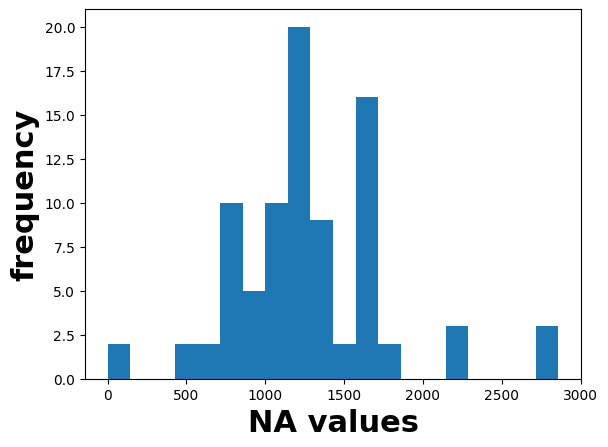

In [104]:
# NA değerlerinin dağılımını görselleştirme
na_val = df.isna().sum()
na_val.sort_values(ascending=False).plot(kind='hist',bins=20) # sıralamanın azalana doğru
plt.ylabel('frequency',fontsize=22,weight='bold')
plt.xlabel('NA values',fontsize=22,weight='bold')
plt.show()

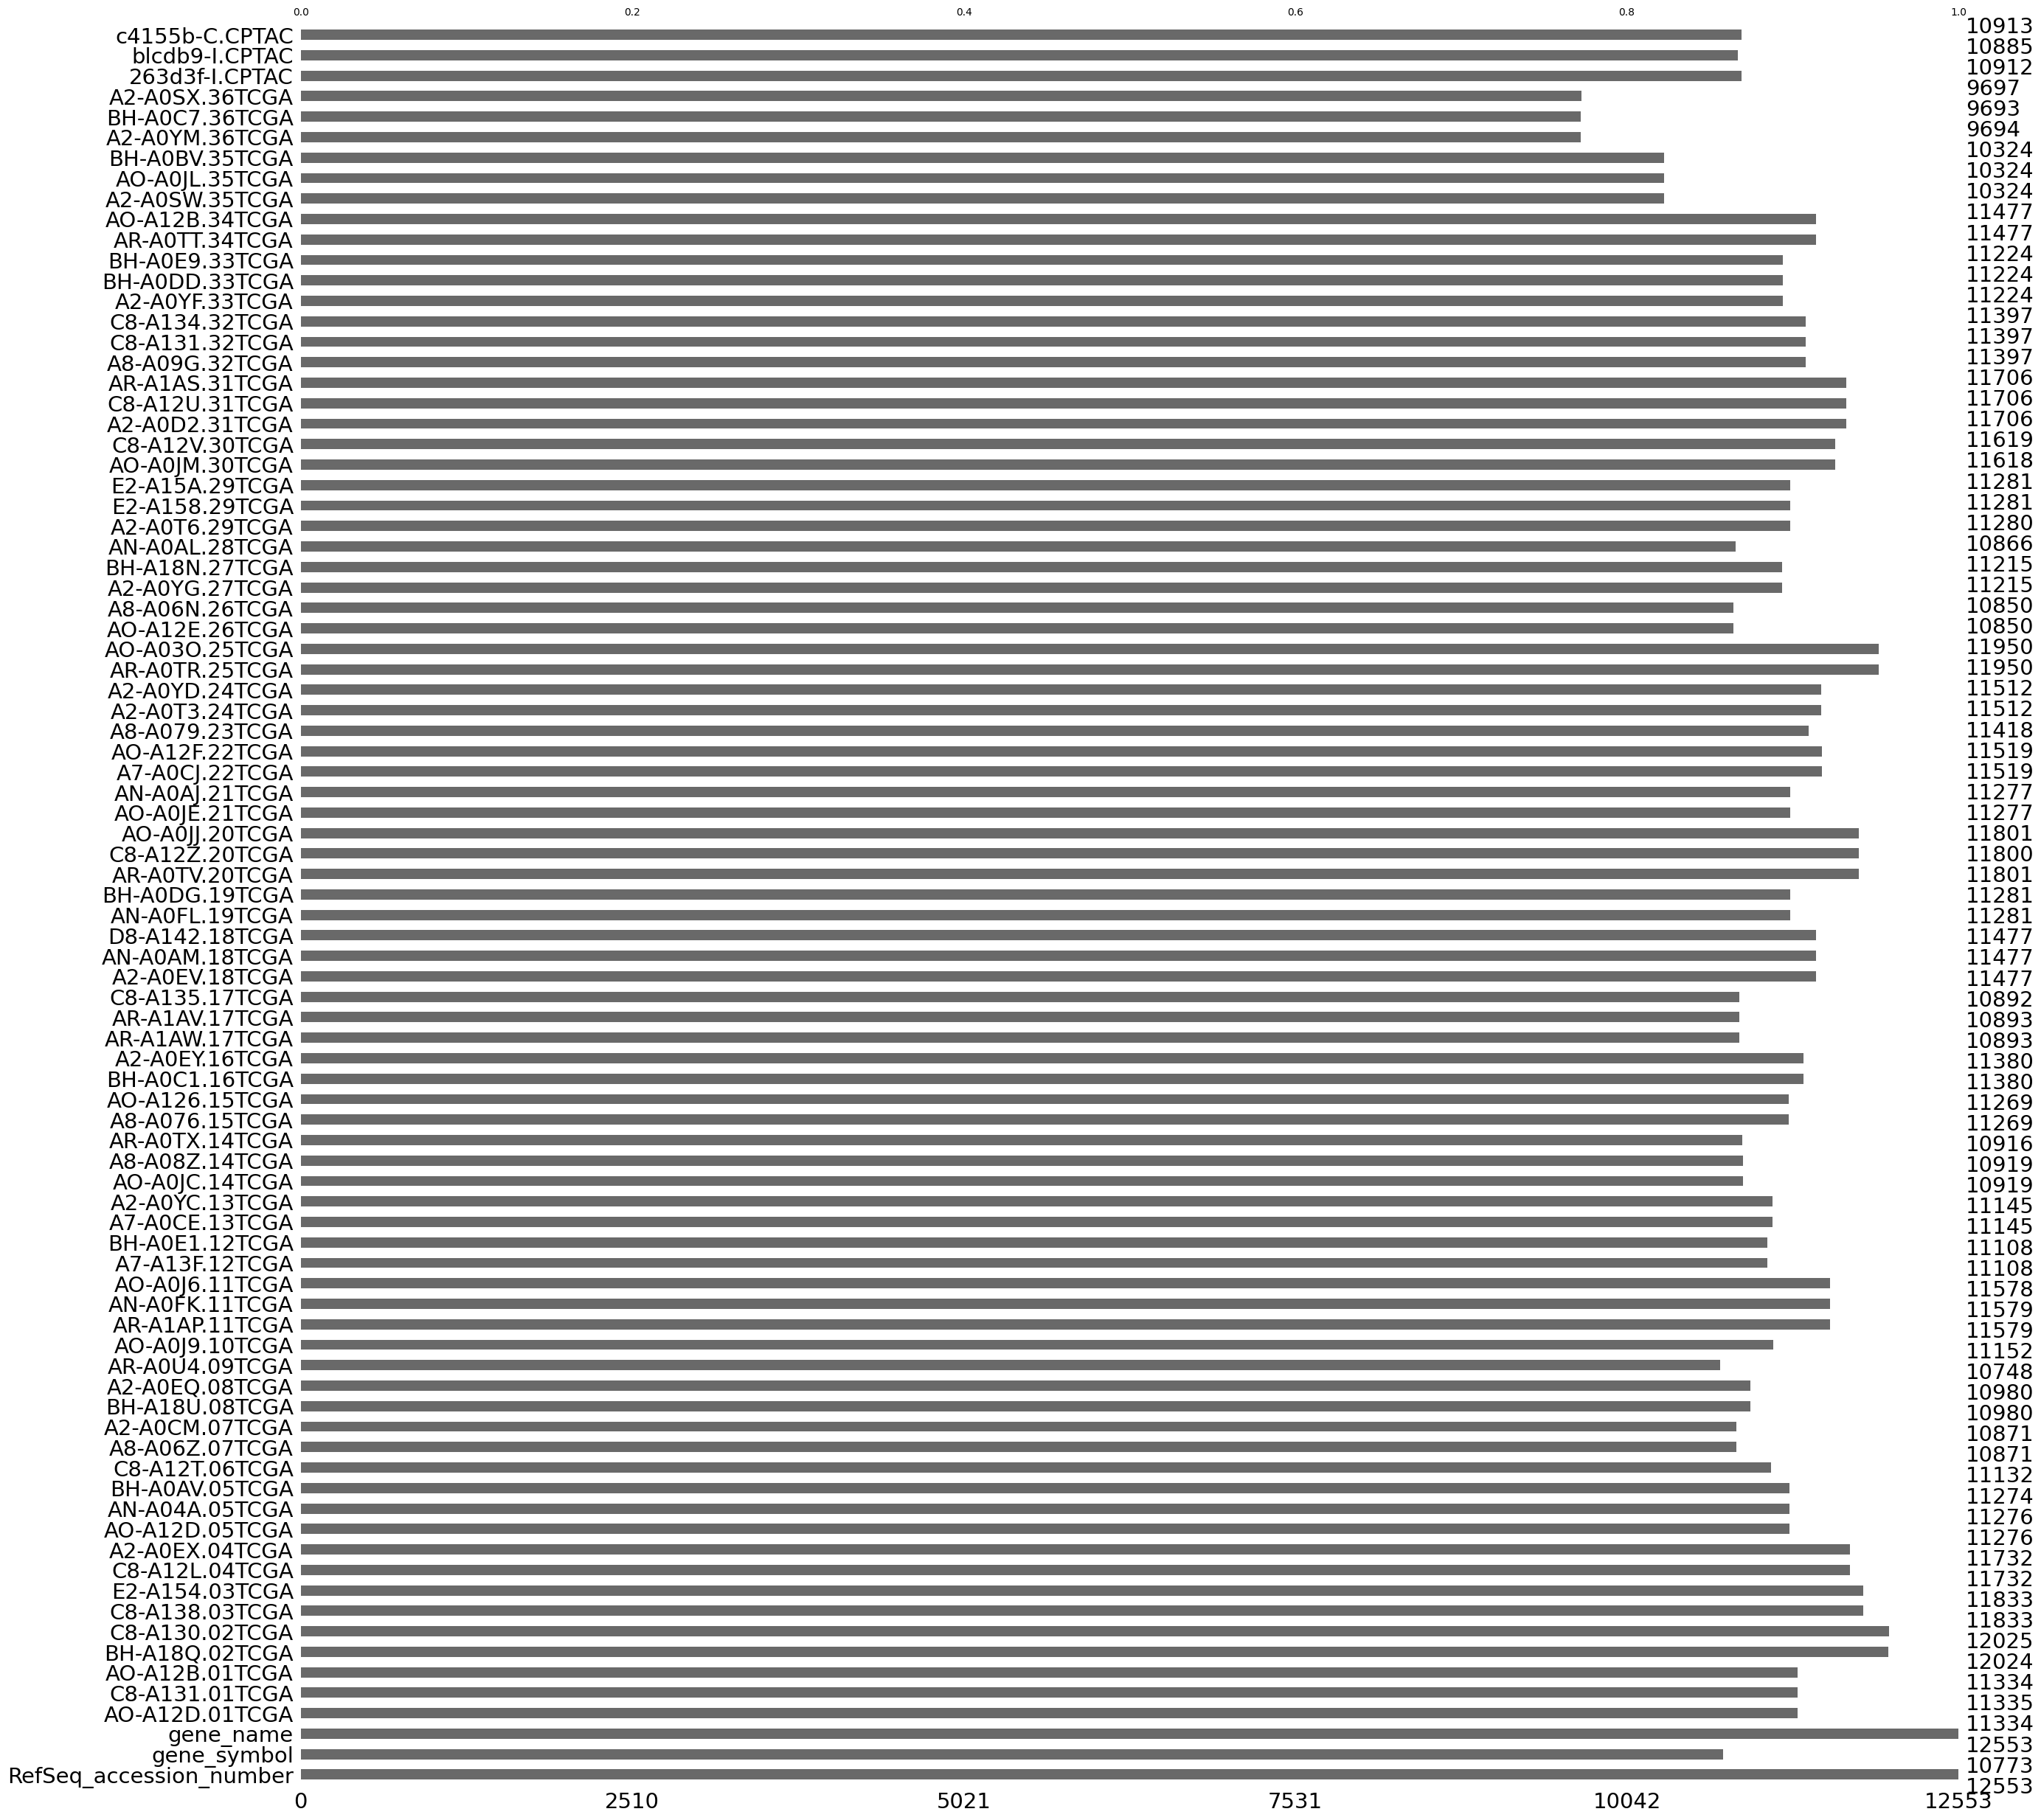

In [105]:
# Veri kümesindeki her sütundaki eksik veri miktarı
!pip install missingno # -> kütüphaneyi yükledik
import missingno as msno

msno.bar(df = df,
        figsize = (29,31),
        fontsize = 21);

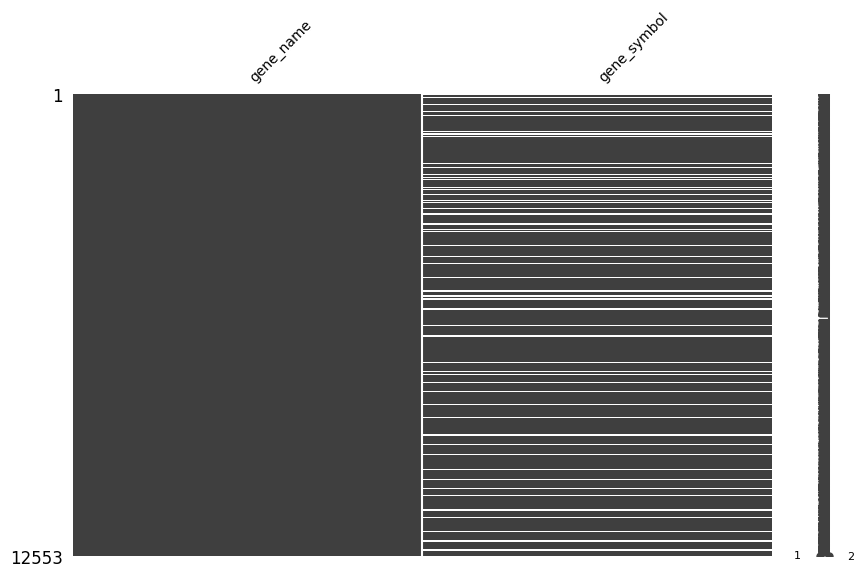

In [106]:
# Değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanılabilir.
msno.matrix(df = df[['gene_name', 'gene_symbol']],
           figsize = (10,6),
           fontsize = 10);
# Aralarında bağlantı olup olmadığını görmek için RefSeq_accession_number ve gene_symbol'ü ele alarak yaptım

***Bu iki sütun arasında eksiklik açısından bağımsızlık vardır. Yani gene_symbol sütununda eksik değer olması, diğer sütunu doğrudan etkilememiştir.***

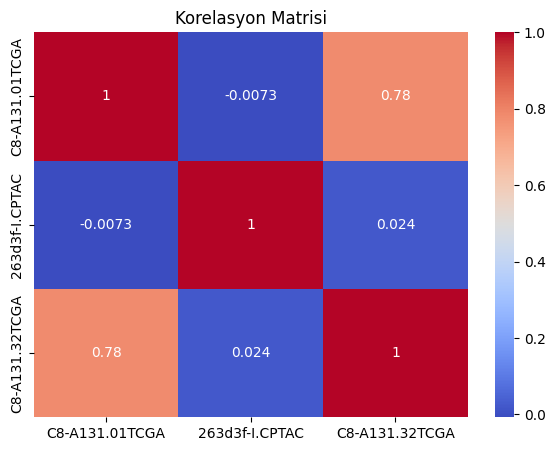

In [107]:
plt.figure(figsize = (7,5))
sns.heatmap(df[['C8-A131.01TCGA', '263d3f-I.CPTAC', 'C8-A131.32TCGA']].corr(), annot = True, cmap = 'coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()


****Bu korelasyon matrisine göre, C8-A131.01TCGA ve C8-A131.32TCGA arasında ilişki olduğunu görüyoruz, biyolojik olarak birbiriyle daha yakından bağlantılı olabileceği anlamına gelir. Diğer iki gen, 263d3f-I.CPTAC ile her iki C8-A131 geninin korelasyonu çok düşük ve birbirleriyle zayıf ilişkiler gösteriyor.****

## **2.1- Eksik Verilerin Doldurulması**

**Veri setimde toplamda 968,698 eksik olmayan ve 110,860 eksik gözlem bulunmaktadır. Eksik veriler, veri setinin yaklaşık %10'u gibi bir oranı oluşturuyor. Bu nedenle, eksik gözlemleri doldurmayı tercih ettim.****

In [108]:
# Df' deki orijinalliği kaybetmemek için kopya oluşturdum.
df_fillna = df.copy()
df_fillna.head(3)

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747


In [109]:
# Eksik verileri tekrardan gözlemliyoruz.
df_fillna.isna().sum()

RefSeq_accession_number       0
gene_symbol                1780
gene_name                     0
AO-A12D.01TCGA             1219
C8-A131.01TCGA             1218
                           ... 
BH-A0C7.36TCGA             2860
A2-A0SX.36TCGA             2856
263d3f-I.CPTAC             1641
blcdb9-I.CPTAC             1668
c4155b-C.CPTAC             1640
Length: 86, dtype: int64

In [110]:
# Doldurma işlemini döngüyle yapma. Yani tüm numerik değerleri doldurma
to_be_filled = numerical_features
for col in to_be_filled:
    df_fillna[col] = df_fillna[col].fillna(df_fillna[col].mean()) #inplace=True yerine atama yapıyorum.



In [111]:
df_fillna.isna().sum()

RefSeq_accession_number       0
gene_symbol                1780
gene_name                     0
AO-A12D.01TCGA                0
C8-A131.01TCGA                0
                           ... 
BH-A0C7.36TCGA                0
A2-A0SX.36TCGA                0
263d3f-I.CPTAC                0
blcdb9-I.CPTAC                0
c4155b-C.CPTAC                0
Length: 86, dtype: int64

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AO-A12D.01TCGA,11334.0,0.133079,1.734231,-12.466750,-0.656376,0.078915,0.905641,17.623036
C8-A131.01TCGA,11335.0,0.128822,1.579845,-13.156553,-0.583835,0.116448,0.853163,12.677023
AO-A12B.01TCGA,11334.0,-0.440764,1.634930,-9.911008,-1.330525,-0.318937,0.489641,8.289261
BH-A18Q.02TCGA,12024.0,-0.729233,2.422452,-24.553794,-1.266591,-0.296430,0.449590,11.790434
C8-A130.02TCGA,12025.0,-0.039436,1.353505,-15.004199,-0.671172,0.024160,0.719492,6.925004
...,...,...,...,...,...,...,...,...
BH-A0C7.36TCGA,9693.0,-0.368762,1.453737,-10.427946,-1.063180,-0.204129,0.521043,7.886564
A2-A0SX.36TCGA,9697.0,-0.050669,1.716237,-12.967849,-0.934818,-0.079784,0.757374,11.521261
263d3f-I.CPTAC,10912.0,0.069555,1.950822,-12.609296,-0.867155,0.052313,1.009641,16.183559
blcdb9-I.CPTAC,10885.0,-0.298170,1.307027,-9.058864,-1.056363,-0.191285,0.574868,6.435721


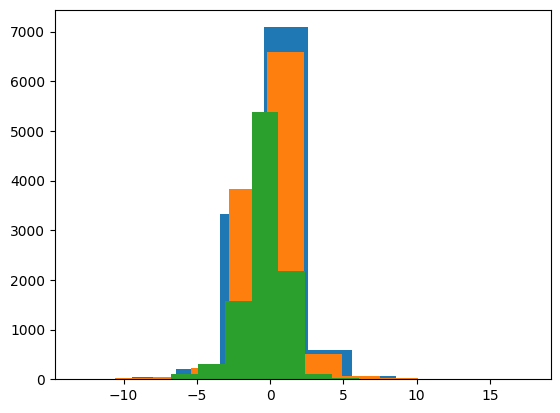

In [113]:
# Sayısal değişkenin dağılımını görmek için histograma bakabiliriz
plt.hist(df['AO-A12D.01TCGA'])
plt.hist(df['C8-A131.01TCGA'])
plt.hist(df['BH-A0C7.36TCGA'])
plt.show()

**Simetrik dağıldığını varsayarak mean ile işlemimi gerçekleştirdim.****

## **2.2- Kategorik Değişkenlerin Doldurulması**

In [114]:
df_fillna[["gene_symbol"]][:25] # Frame olarak görüntüledik

,gene_symbol
0,PLEC
1,NaN
2,PLEC
3,NaN
4,NaN
5,PLEC
6,PLEC
7,NaN
8,NaN
9,AHNAK


In [115]:
df['gene_symbol'].value_counts() # Toplam kaç tane benzersiz veri olduğunu görmek istedim

gene_symbol
PLEC        4
LDB3        4
TPM1        4
RAP1GDS1    4
FHL1        4
           ..
TRIM22      1
ALS2        1
RAB7A       1
C1ORF198    1
KIAA1737    1
Name: count, Length: 10062, dtype: int64

In [116]:
# Kategorik değişkenin mode değeriyle doldurulma

# gene_symbol' da toplam kaç adet eksik değer olduğu
df_fillna['gene_symbol'].isna().sum()

# En çok tekrar eden değeri
gene_symbol_mode = df_fillna['gene_symbol'].mode()

# gene_symbol' ü mode değeri ile doldurma
df_fillna['gene_symbol'] = df_fillna['gene_symbol'].fillna(value = gene_symbol_mode[0])

# Eksik değerleri tekrar görelim
df_fillna.isna().sum()

RefSeq_accession_number    0
gene_symbol                0
gene_name                  0
AO-A12D.01TCGA             0
C8-A131.01TCGA             0
                          ..
BH-A0C7.36TCGA             0
A2-A0SX.36TCGA             0
263d3f-I.CPTAC             0
blcdb9-I.CPTAC             0
c4155b-C.CPTAC             0
Length: 86, dtype: int64

In [117]:
df_fillna[["gene_symbol"]][:25] # Frame olarak görüntüledik

,gene_symbol
0,PLEC
1,FHL1
2,PLEC
3,FHL1
4,FHL1
5,PLEC
6,PLEC
7,FHL1
8,FHL1
9,AHNAK


In [118]:
df_fillna 

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.106680,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,FHL1,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.106680,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.106680,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,FHL1,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.106680,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,FHL1,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.106680,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12548,NP_001191293,FHL1,protein FAM24B precursor,0.133079,0.128822,-0.440764,-16.029761,1.729692,4.107251,-9.584499,...,-6.662350,-0.103215,-0.021222,-0.100912,0.488502,-0.368762,-0.050669,-8.020071,-3.093822,-4.602418
12549,NP_775791,FHL1,putative uncharacterized protein C9orf62,0.133079,0.128822,-0.440764,-2.046065,-0.425182,-3.203370,-4.786183,...,-0.677085,-0.103215,-0.021222,-0.100912,0.488502,-0.368762,-0.050669,0.049608,-0.646977,0.240590
12550,NP_004065,COX8A,"cytochrome c oxidase subunit 8A, mitochondrial",0.133079,0.128822,-0.440764,-1.778435,-0.149673,1.971481,-3.103949,...,-0.677085,-0.103215,-0.021222,-0.100912,0.488502,-0.368762,-0.050669,0.069555,-0.298170,0.310974
12551,NP_068752,MIIP,migration and invasion-inhibitory protein,-0.633517,4.840325,-1.965192,-0.729233,-0.039436,0.115353,-0.618354,...,-0.677085,-0.103215,-0.021222,-0.100912,0.488502,-0.368762,-0.050669,0.019861,-1.718327,-0.369183


## **3- Kategorik Değişkenlerde Görselleştirme**

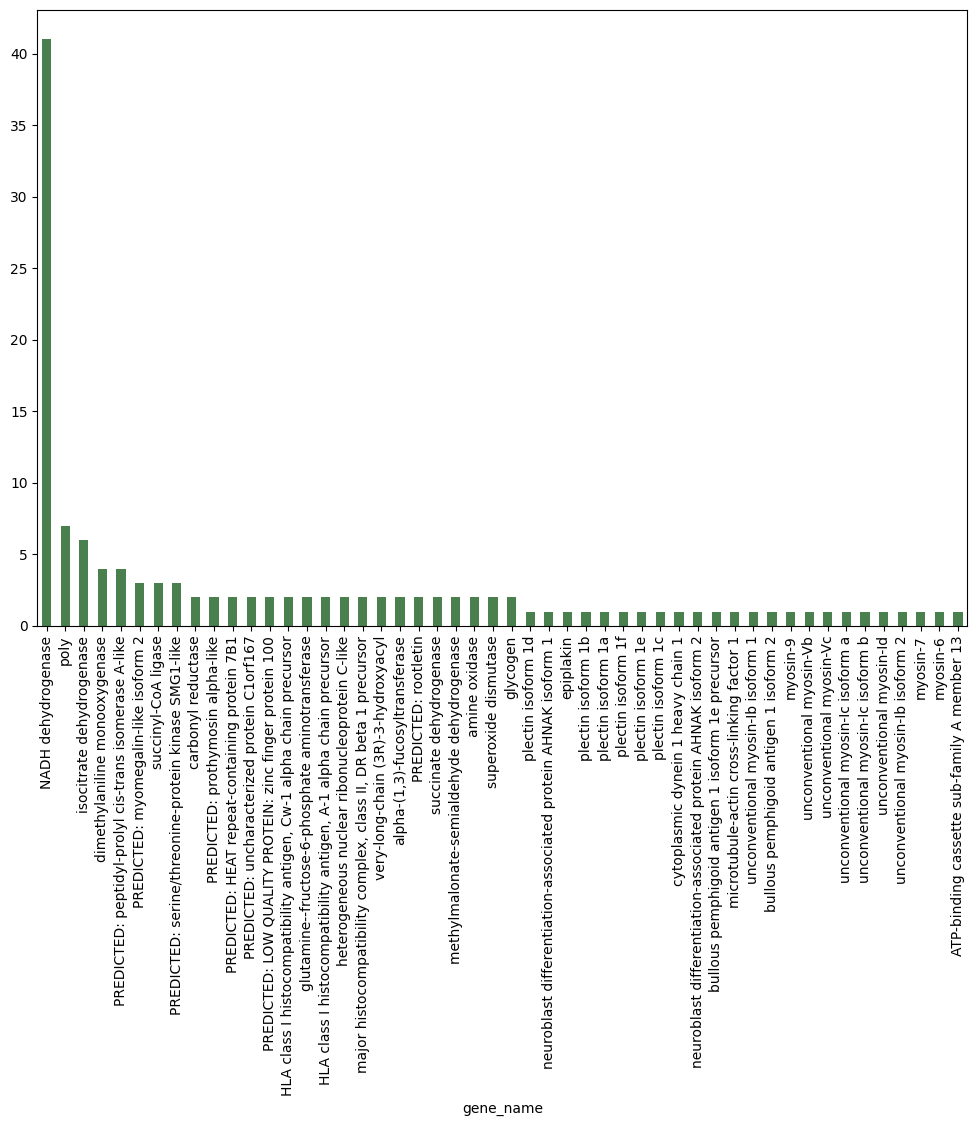

In [119]:
# Grafik boyutlarını ayarlama
plt.figure(figsize=(12, 8))  # Genişlik: 12, Yükseklik: 8 

# Bar grafiği oluşturma
df["gene_name"].value_counts().sort_values(ascending=False).head(50).plot(kind="bar", color="#4a804d")

# Grafiği gösterme
plt.show()

***Genlerin dağılımı***

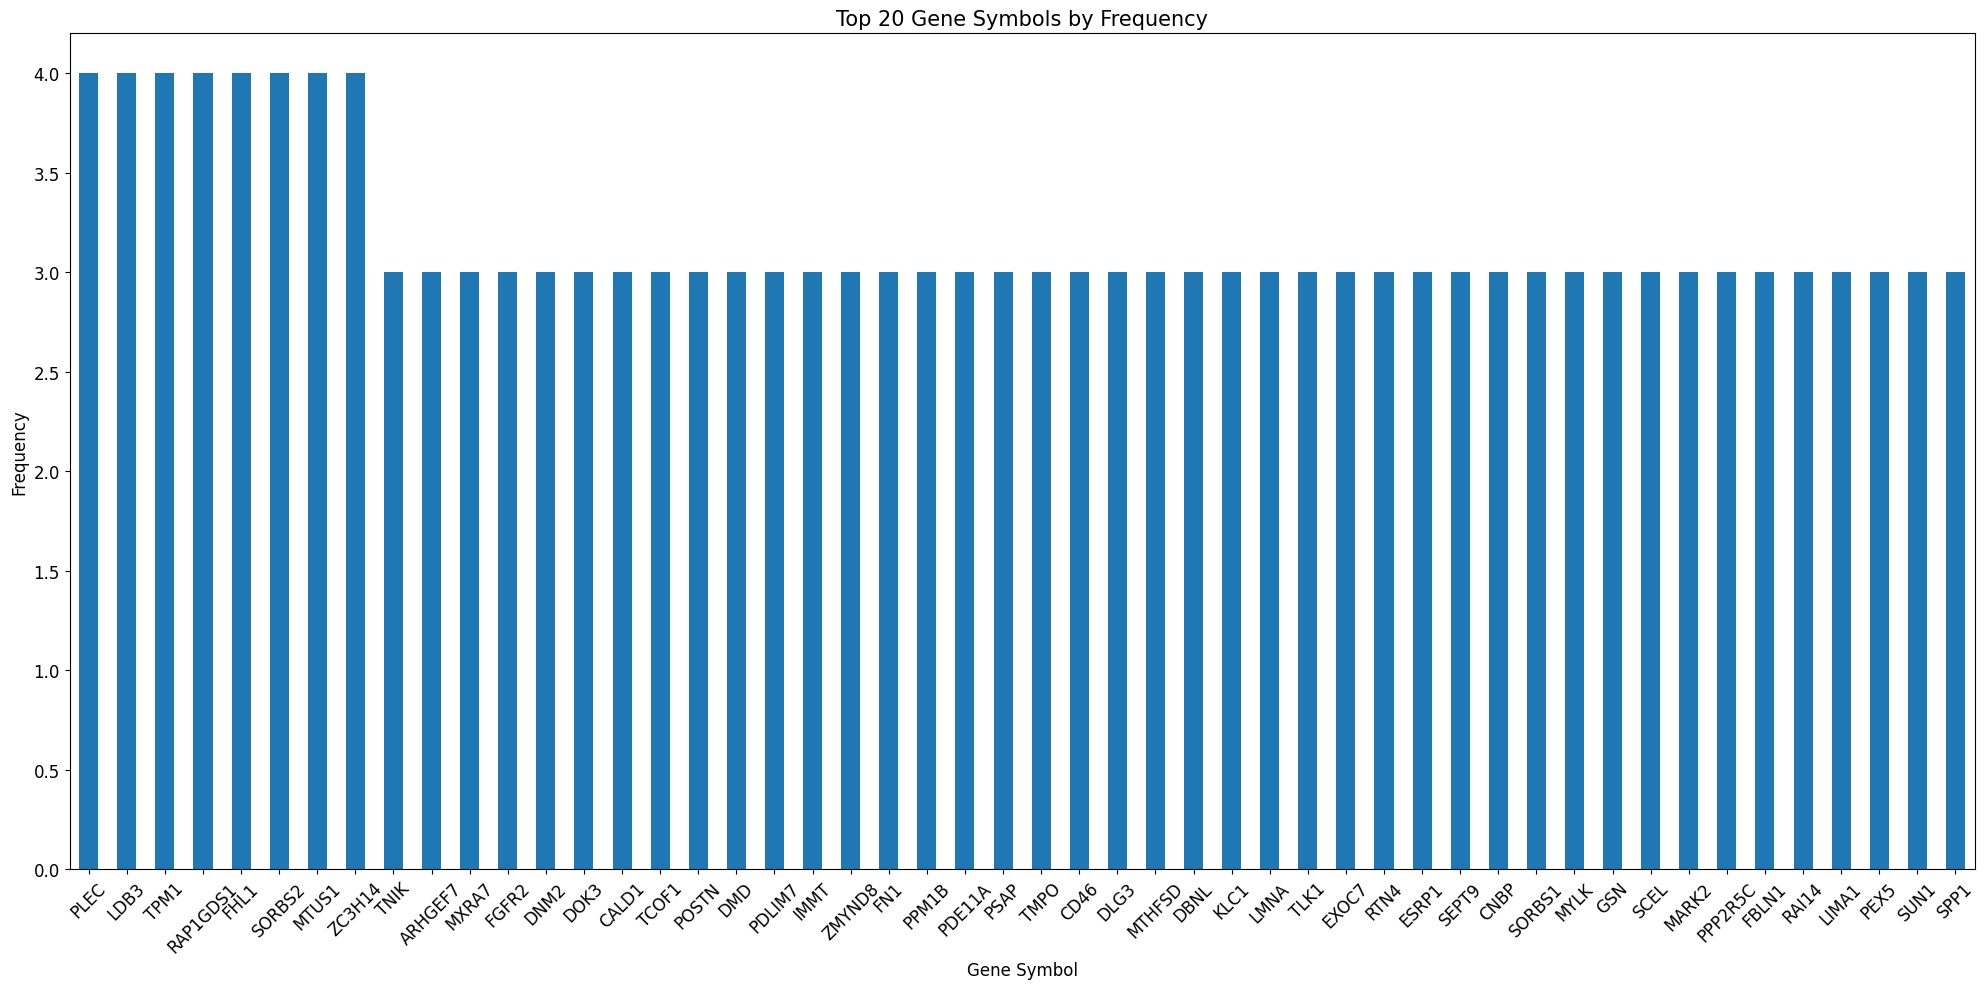

In [120]:
plt.figure(figsize=(20, 10))
top_genes = df['gene_symbol'].value_counts().head(50)  # Sadece ilk 50 gen sembolü
top_genes.plot.bar()
plt.xticks(rotation=45, fontsize=12)  # Daha az döndürme
plt.yticks(fontsize=12)
plt.title("Top 20 Gene Symbols by Frequency", fontsize=15)
plt.xlabel("Gene Symbol", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


*****Çok fazla veri olduğu için karmaşıklık oluyordu. Bende ilk 50 yi kullanmak istedim.*****


***Grafikte en yüksek bara sahip olan değerler, veri setindeki en sık görülen gen sembolleridir.***

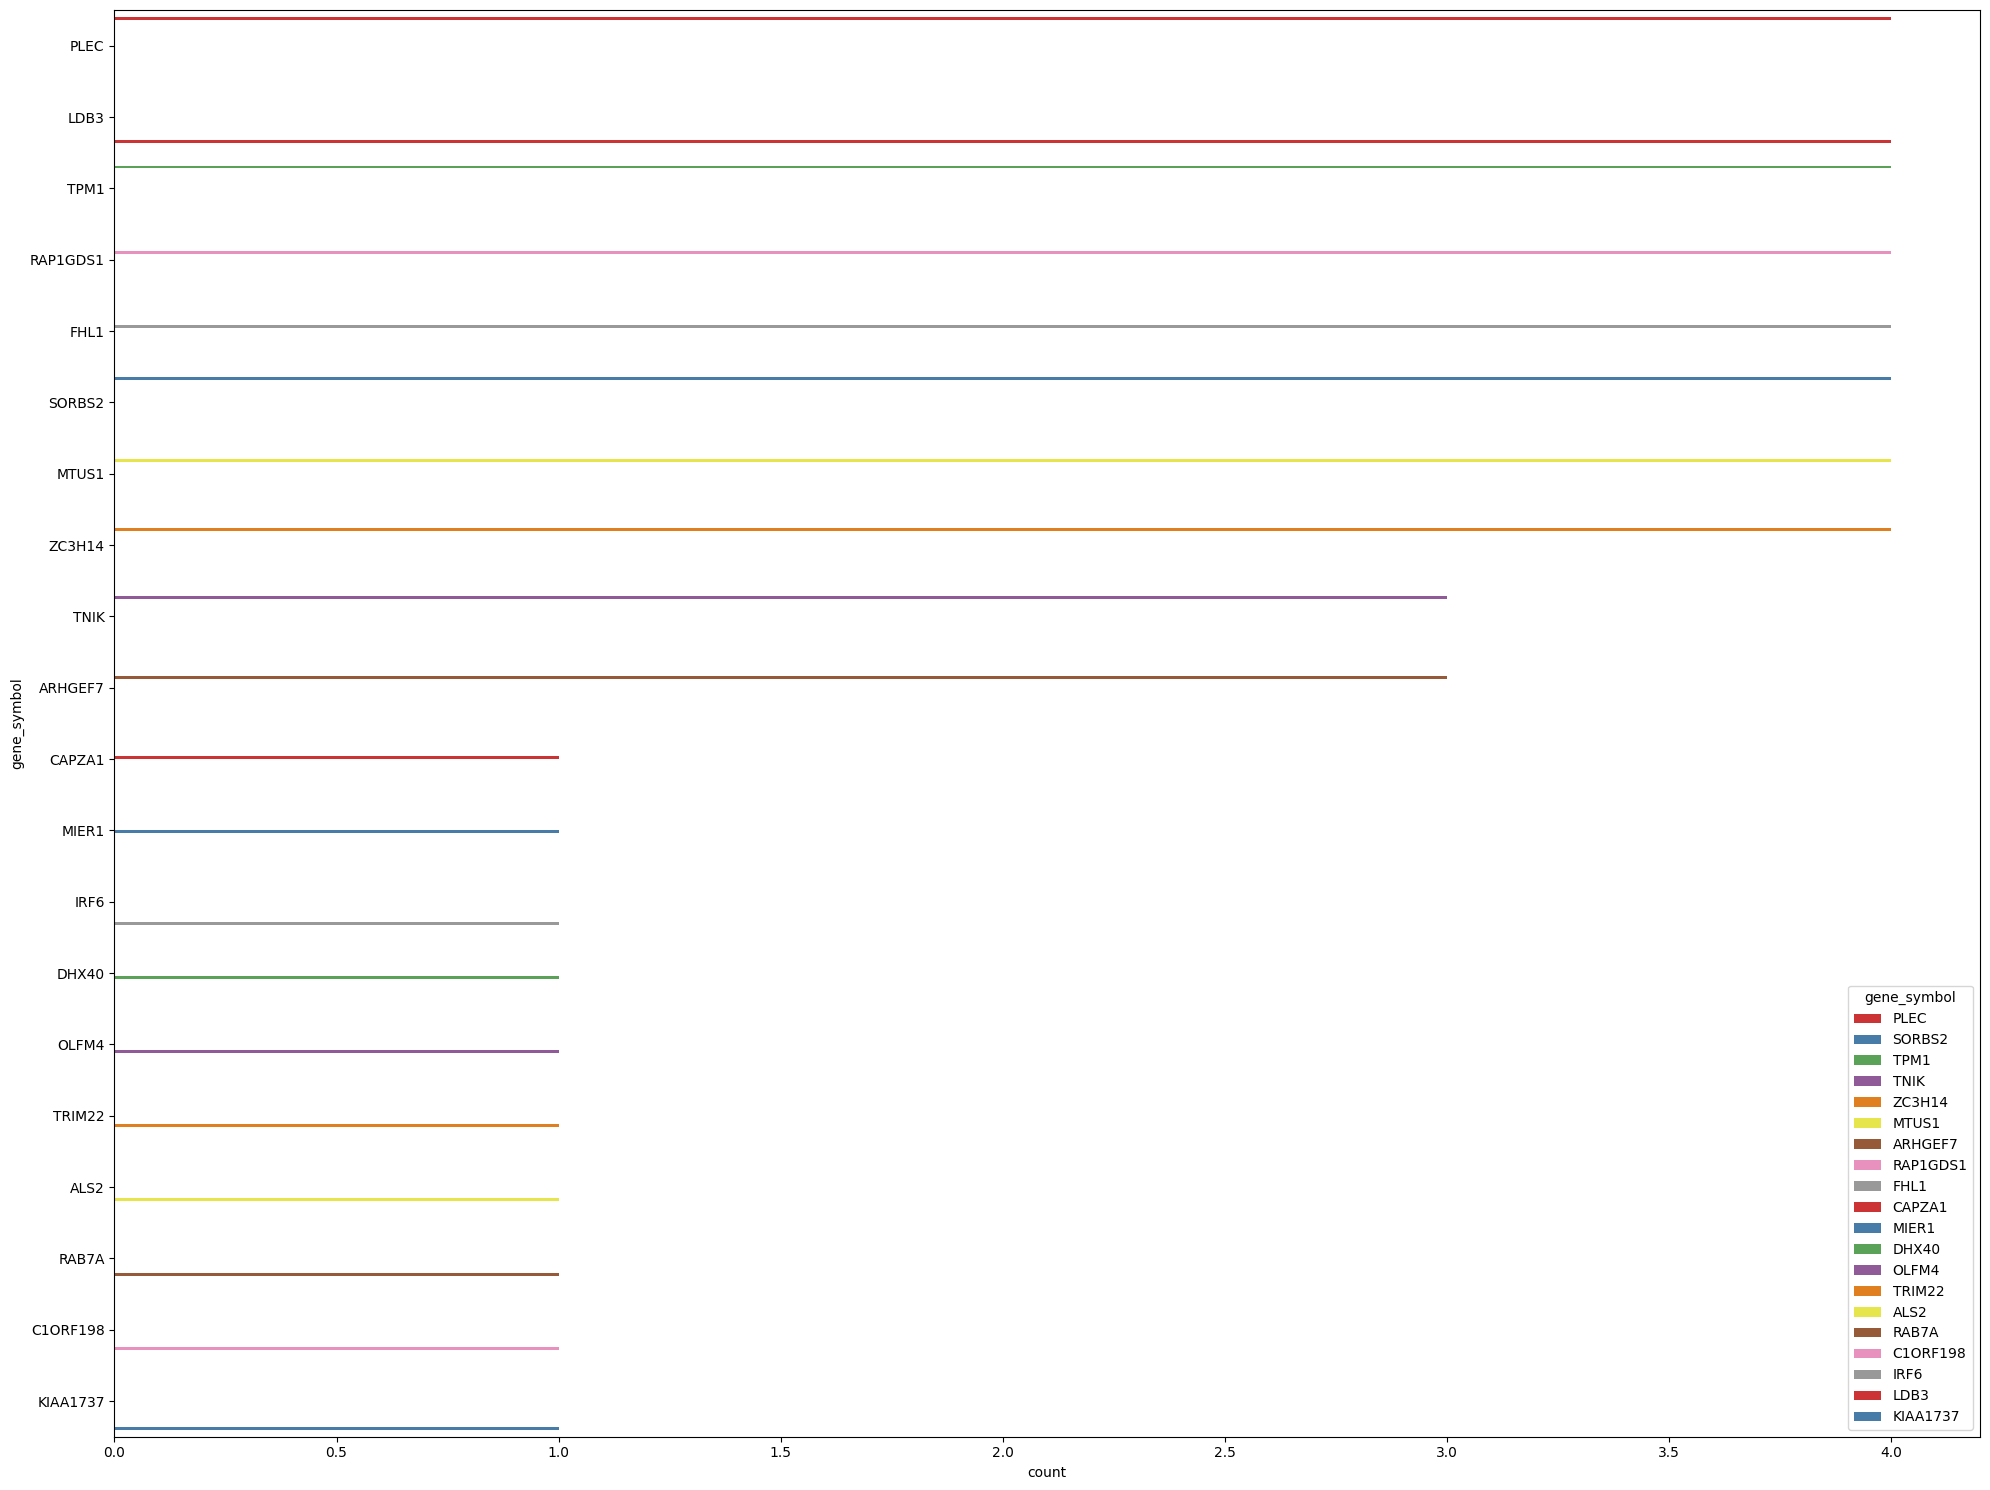

In [121]:
# En yaygın 10 gen
top_genes = df["gene_symbol"].value_counts().head(10).index  

# En nadir 10 gen
rare_genes = df["gene_symbol"].value_counts().tail(10).index

# Yaygın ve nadir genleri birleştiriyoruz
selected_genes = top_genes.append(rare_genes)

# Grafik boyutunu büyütüyoruz
plt.figure(figsize=(20, 15))  # Genişlik ve yükseklik ayarı

# Hem yaygın hem nadir genler için countplot
sns.countplot(data = df[df["gene_symbol"].isin(selected_genes)],
              y = "gene_symbol",
              hue = "gene_symbol",
              order = selected_genes,
              palette = "Set1")

# Grafik düzenini sıkıştırıyoruz
plt.tight_layout()

# Görselleştirmeyi gösteriyoruz
plt.show()

*****En yaygın ve en nadir genlerin veri setindeki dağılımını ve sıklıklarını anlamak için*****

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


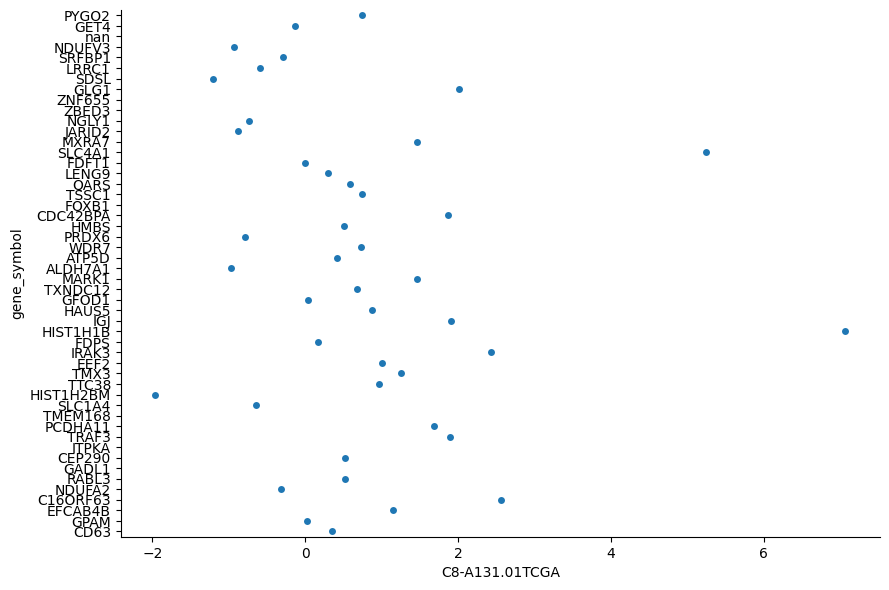

In [122]:
# Rastgele 60 satır seç
subset = df.sample(n=60, random_state=42)

# Catplot kullanarak görselleştirme (stripplot tipi)
sns.catplot(data=subset, x="C8-A131.01TCGA", y="gene_symbol", kind="strip", jitter=True, height=6, aspect=1.5);


***Yayılım tablosundaki seyrek dağılım, verilerin belirli kategorilerde toplanmak yerine geniş bir alana yayıldığını gösteriyor. Bu durumda, seçilen veri kümesinde "C8-A131.01TCGA" değerlerinin farklı "gene_symbol" gruplarında dengeli veya yoğunlaşmamış şekilde dağıldığını ifade eder.***

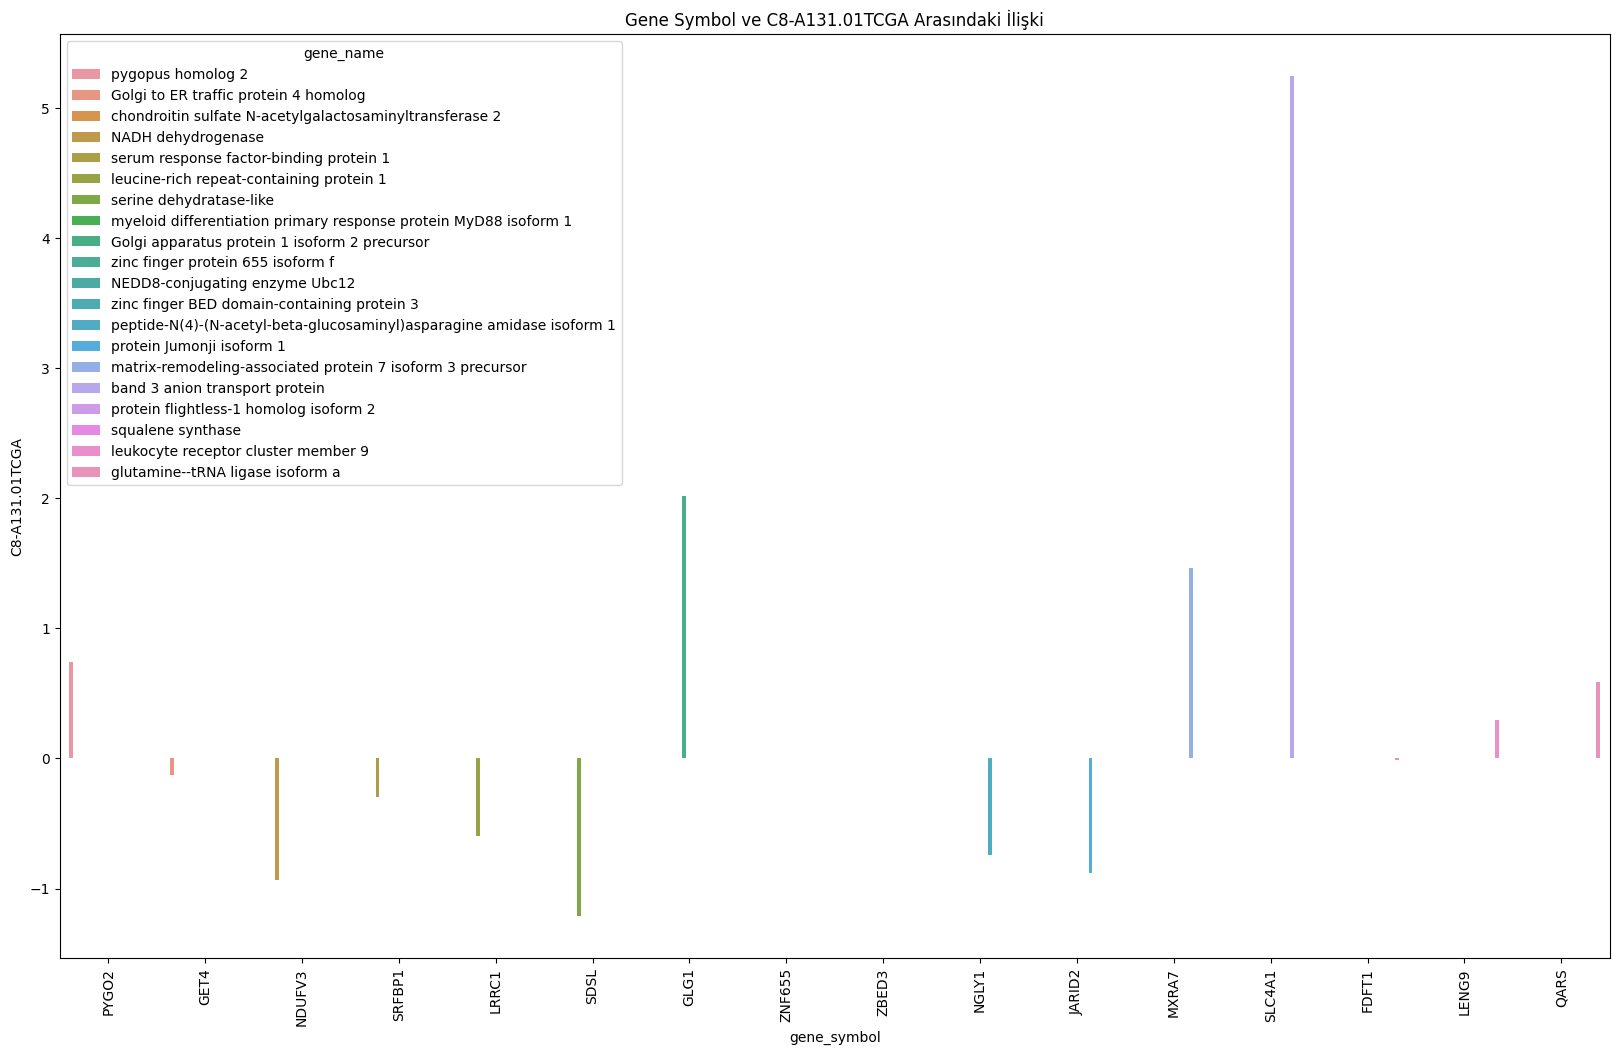

In [123]:
# 20 rastgele örnek seç
subset = df.sample(n=20, random_state=42)

# Sütun grafiği oluşturuluyor
plt.figure(figsize=(20, 12))  # Grafik boyutu
sns.barplot(x="gene_symbol", y="C8-A131.01TCGA", data=subset, hue="gene_name");  # Kategorik x ve sayısal y
plt.title('Gene Symbol ve C8-A131.01TCGA Arasındaki İlişki')  # Başlık
plt.xticks(rotation=90)  # X-etiketlerini döndürmek
plt.show()

***GLG1 ve SLC4A1 gibi genler, C8-A131.01TCGA ile yüksek pozitif ilişki gösteriyor. Bazı genler, C8-A131.01TCGA ile zayıf veya negatif ilişki gösteriyor. Bu genlerin etkileri, C8-A131.01TCGA'ya göre daha düşük***

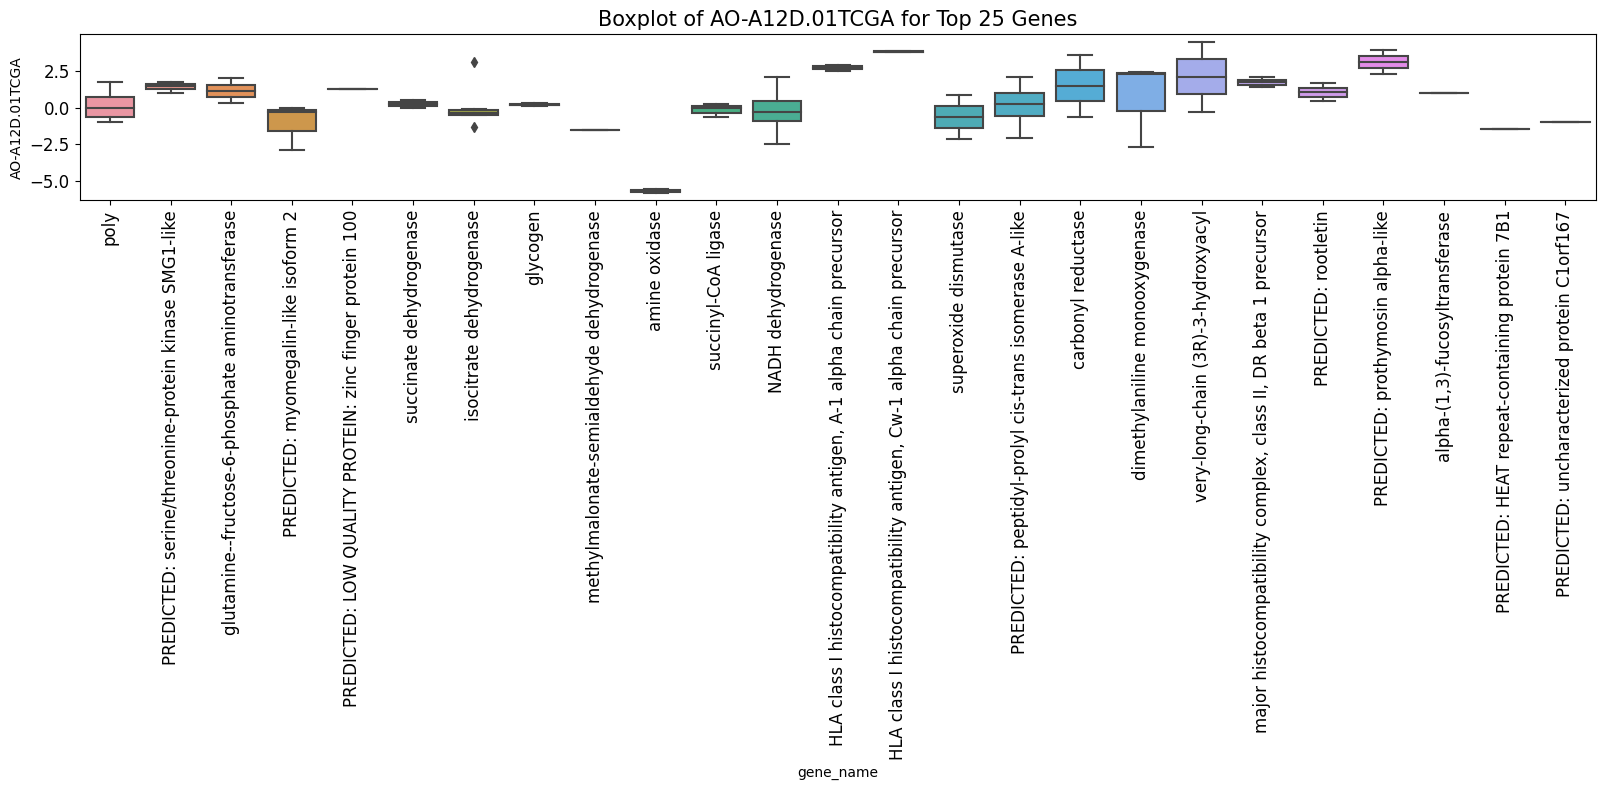

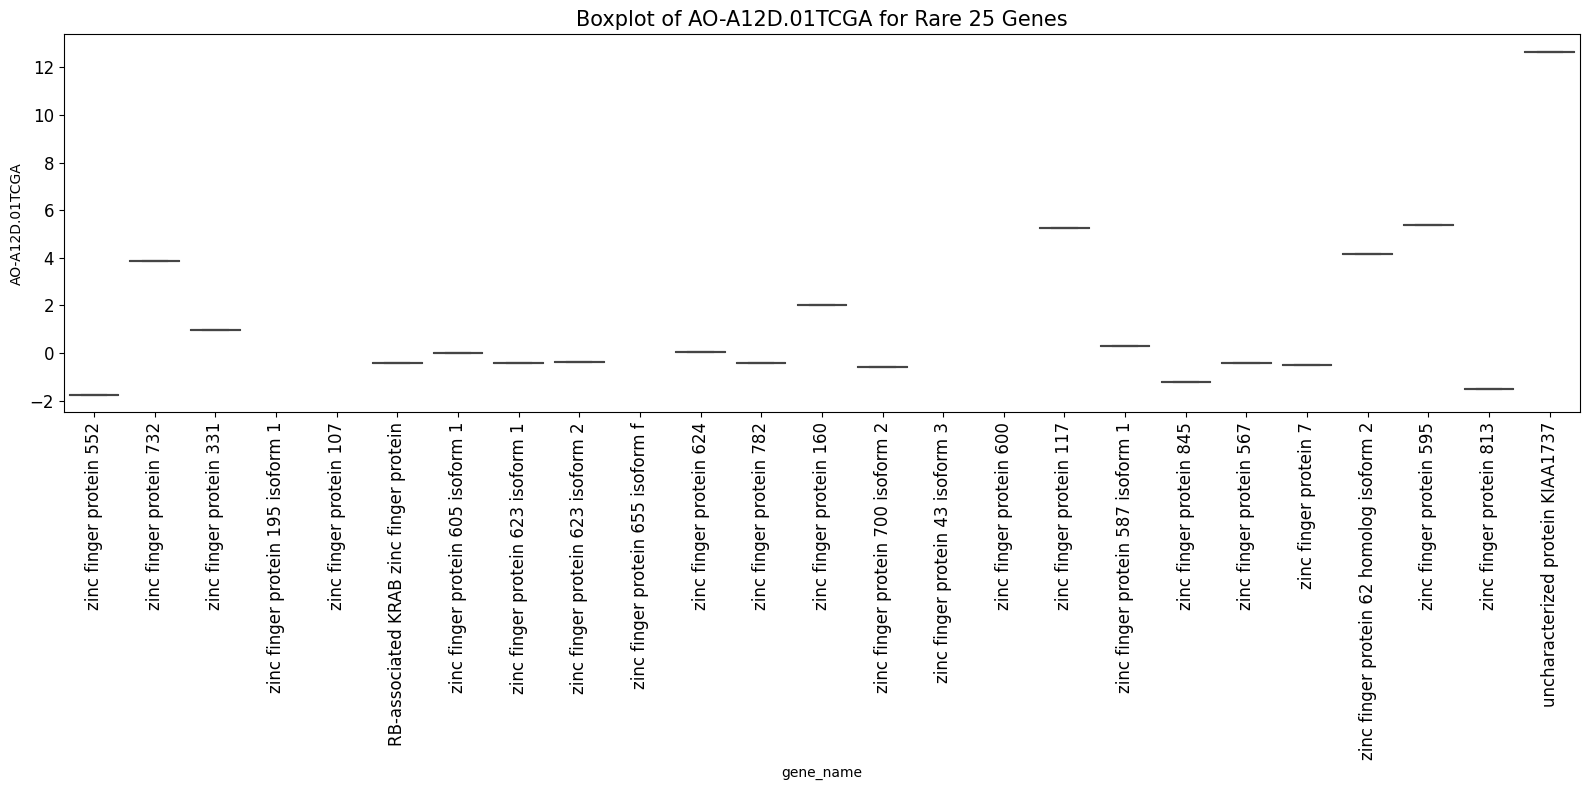

In [124]:
# En yaygın 25 gen ismini seçme
top_25_genes = df['gene_name'].value_counts().head(25).index

# En nadir 25 gen ismini seçme
rare_25_genes = df['gene_name'].value_counts().tail(25).index

# Yaygın ve nadir genlere ait veriler
df_top_25_genes = df[df['gene_name'].isin(top_25_genes)]
df_rare_25_genes = df[df['gene_name'].isin(rare_25_genes)]

# Yaygın genler için boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(x="gene_name", y="AO-A12D.01TCGA", data=df_top_25_genes)
plt.title("Boxplot of AO-A12D.01TCGA for Top 25 Genes", fontsize=15)
plt.xticks(rotation=90, fontsize=12)  # X eksenindeki etiketleri döndürme
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Nadir genler için boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(x="gene_name", y="AO-A12D.01TCGA", data=df_rare_25_genes)
plt.title("Boxplot of AO-A12D.01TCGA for Rare 25 Genes", fontsize=15)
plt.xticks(rotation=90, fontsize=12)  # X eksenindeki etiketleri döndürme
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


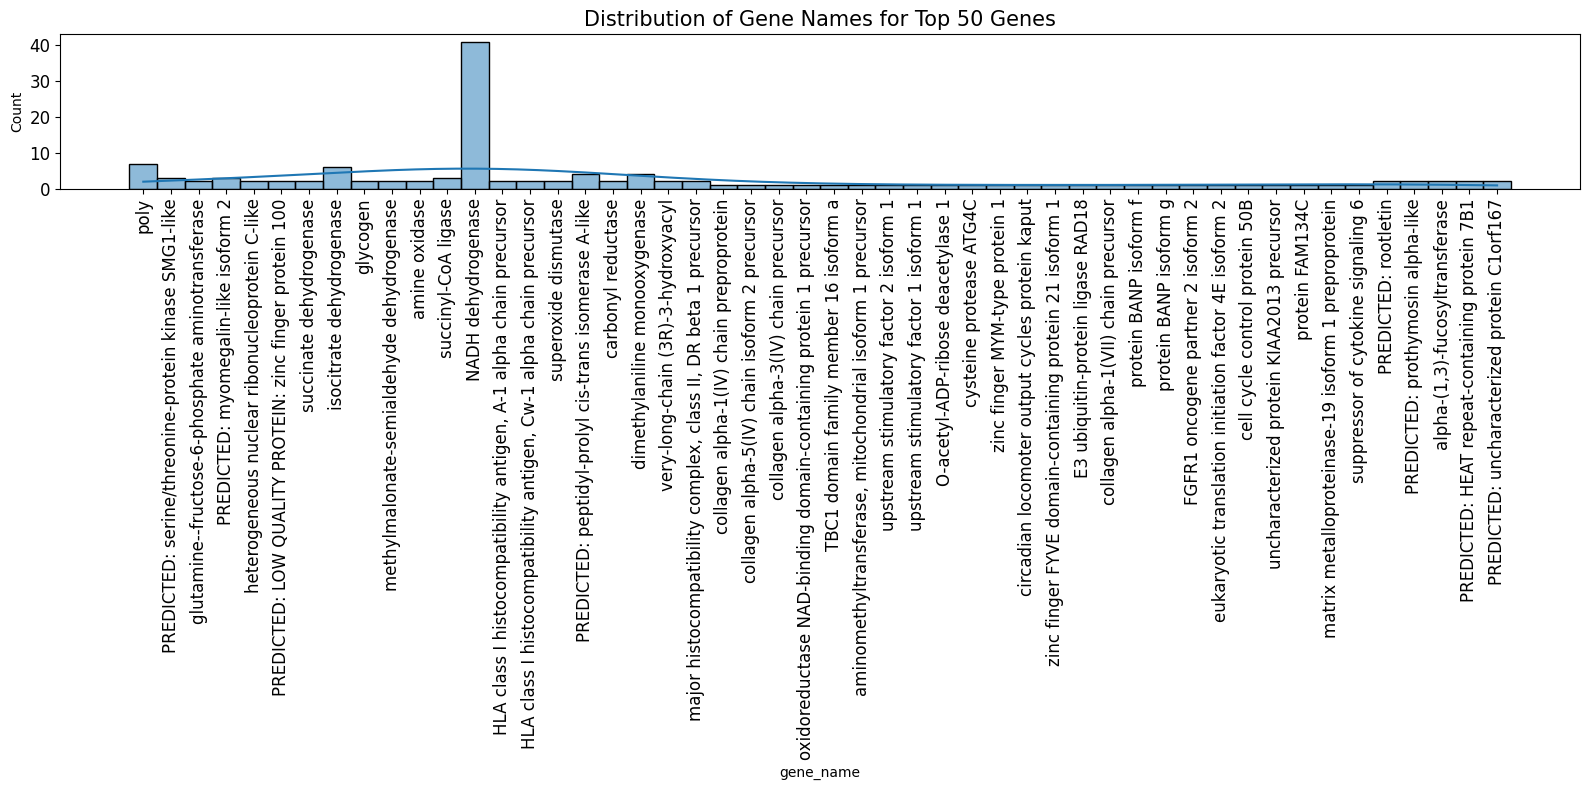

In [125]:
# Grafik boyutunu büyütme
plt.figure(figsize=(16, 8))  # Genişlik: 16, Yükseklik: 8 (İhtiyaca göre ayarlayabilirsiniz)

# En sık görülen 50 gen ismini seçme
top_50_genes = df['gene_name'].value_counts().head(50).index

# Sadece bu genlere ait veriler
df_top_50_genes = df[df['gene_name'].isin(top_50_genes)]

# gene name dağılımı için histogram
sns.histplot(df_top_50_genes["gene_name"], kde=True)
plt.title("Distribution of Gene Names for Top 50 Genes", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


***Grafik veri setindeki gen isimlerinin dağılımını, hangi genlerin daha yaygın olduğunu ve hangi genlerin daha nadir olduğunu anlamamızı sağlıyor. Bu tür bir dağılım, genetik analizlerde işimize yarar.***